In [2]:
import torch
from torchvision import datasets,transforms
import random as random
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [4]:
torch.cuda.device_count()
import os 
os.cpu_count()

4

### Load Dataset
As (3,256,256) image

In [5]:
from pathlib import Path

# Setup path to data folder
data_path = Path('/kaggle/input/classify-ai-or-real/Classify_aiorreal/')
test_path = Path('/kaggle/input/ai-cla/')

In [6]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(data_path)

There are 2 directories and 0 images in '/kaggle/input/classify-ai-or-real/Classify_aiorreal'.
There are 0 directories and 2376 images in '/kaggle/input/classify-ai-or-real/Classify_aiorreal/ai'.
There are 0 directories and 2351 images in '/kaggle/input/classify-ai-or-real/Classify_aiorreal/real'.


Random image path: /kaggle/input/classify-ai-or-real/Classify_aiorreal/real/animals_538.jpg
Image class: real
Image height: 512
Image width: 512


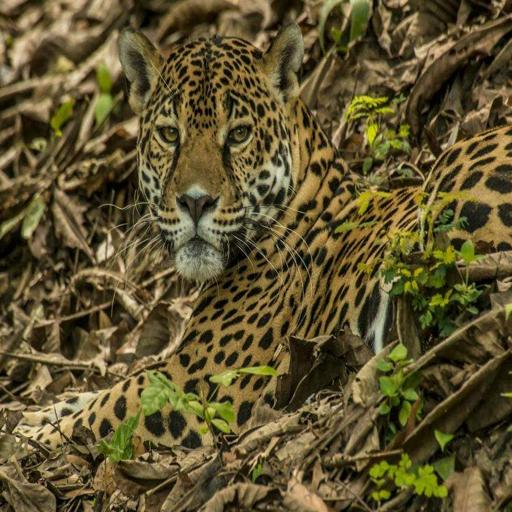

In [6]:
import random
from PIL import Image

# Set seed
random.seed(56) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(data_path.glob('*/*.jpg'))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}") 
print(f"Image width: {img.width}")
img

In [8]:
# Write transform for image
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(512, 512)),    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])
data = datasets.ImageFolder(root=data_path,transform=data_transform)
test_data = datasets.ImageFolder(root = test_path,transform=data_transform)

In [9]:
dictt = data.class_to_idx
class_names = data.classes
class_names
test_data.classes

['ai', 'real']

In [9]:
img,label = data[0][0],data[0][1]

In [10]:
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.2039, 0.1961, 0.1882,  ..., 0.9686, 0.9686, 0.9725],
         [0.1686, 0.1647, 0.1569,  ..., 0.9686, 0.9686, 0.9725],
         [0.1686, 0.1608, 0.1529,  ..., 0.9686, 0.9686, 0.9725],
         ...,
         [0.0784, 0.0784, 0.0784,  ..., 0.0706, 0.0627, 0.0627],
         [0.0784, 0.0784, 0.0784,  ..., 0.0745, 0.0706, 0.0706],
         [0.0784, 0.0784, 0.0784,  ..., 0.0745, 0.0745, 0.0784]],

        [[0.3686, 0.3608, 0.3529,  ..., 0.9725, 0.9725, 0.9765],
         [0.3333, 0.3294, 0.3216,  ..., 0.9725, 0.9725, 0.9765],
         [0.3333, 0.3255, 0.3176,  ..., 0.9725, 0.9725, 0.9765],
         ...,
         [0.0941, 0.0941, 0.0941,  ..., 0.0706, 0.0627, 0.0627],
         [0.0941, 0.0941, 0.0941,  ..., 0.0745, 0.0706, 0.0706],
         [0.0941, 0.0941, 0.0941,  ..., 0.0745, 0.0745, 0.0784]],

        [[0.4314, 0.4235, 0.4157,  ..., 0.9490, 0.9490, 0.9529],
         [0.3961, 0.3922, 0.3843,  ..., 0.9490, 0.9490, 0.9529],
         [0.3961, 0.3882, 0.3804,  ..., 0.94

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


Text(0.5, 1.0, 'ai')

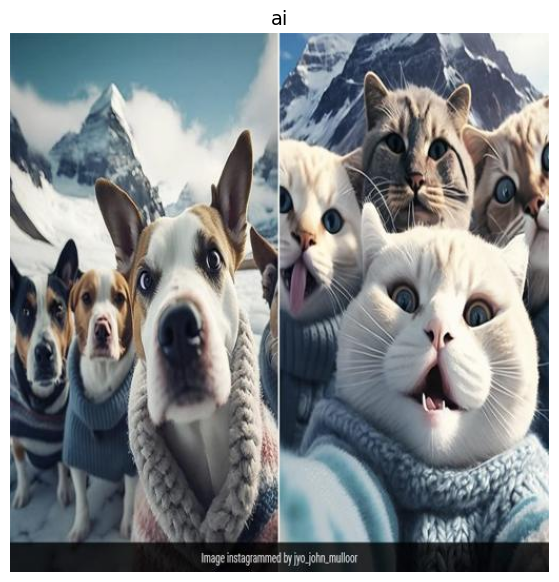

In [11]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1,2,0))
plt.axis("off")
plt.title(class_names[label], fontsize=14)

In [14]:
train_dataloader = DataLoader(data,
                                    batch_size=50,
                                     num_workers=4,
                                      shuffle=True
                                    )
test_dataloader = DataLoader(test_data,
                             batch_size=20,
                             num_workers=4,
                             shuffle=True
)

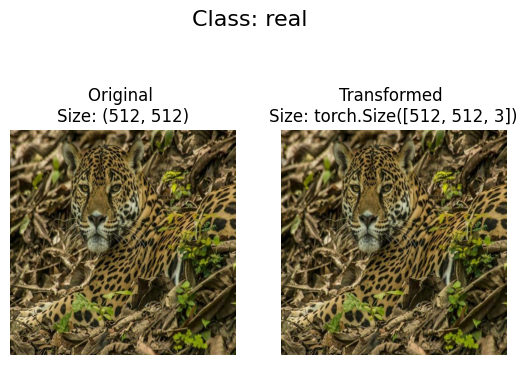

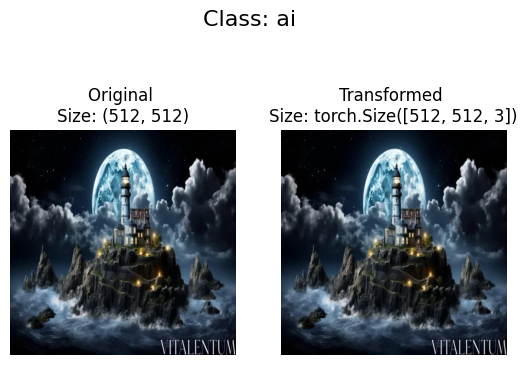

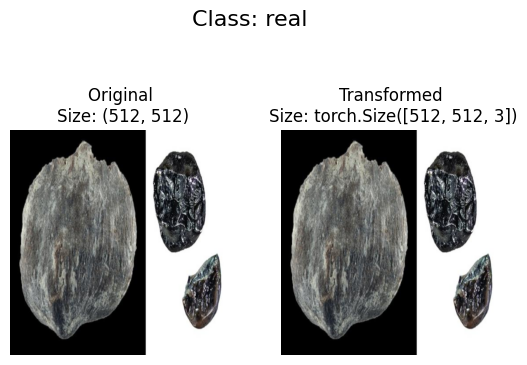

In [13]:
def plot_transformed_images(image_paths, transform, n=3, seed=56):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, 
                        transform=data_transform)

In [14]:
def viz_tensor(img_single):
    i=0
    for img_new in img_single:
        i+=1
        img_new=img_new.permute(1,2,0)
        plt.figure(figsize=(10,7))
        plt.imshow(img_new)
        plt.axis("off")
        if i>1:
            break

In [15]:
import torch.nn as nn
import torch.nn.functional as F
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 10, 3)
        self.conv2 = nn.Conv2d(10, 20, 3)
        self.pool = nn.MaxPool2d(2,2)
        self.ada_pool = nn.AdaptiveAvgPool2d((10, 10))
        self.fc1 = nn.LazyLinear(100)
        self.fc2 = nn.Linear(100, 10)
        self.fc3 = nn.Linear(10, 2)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.ada_pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        x = F.softmax(x, dim=1)
        return x
        
model_0 = MyNet()
model_0

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


MyNet(
  (conv1): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (ada_pool): AdaptiveAvgPool2d(output_size=(10, 10))
  (fc1): LazyLinear(in_features=0, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=2, bias=True)
)

In [11]:
from torchvision import models
import torch.nn as nn
######################################## VGG16 ########################################
def get_my_vgg16():
    my_vgg16 = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
    for params in my_vgg16.parameters():
        params.requires_grad = False
    # print("original vgg16:\n", my_vgg16)


    in_features = my_vgg16.classifier[6].in_features

    my_vgg16.classifier[6] = nn.Sequential(
    nn.Linear(in_features, 100),
    nn.ReLU(),
    nn.Dropout(p = 0.2),
    nn.Linear(100, 2),
    nn.Softmax(dim=1))
    # print("new vgg16:\n", my_vgg16)
    return my_vgg16

def get_my_resnet18():
    my_resnet18 = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    for params in my_resnet18.parameters():
        params.requires_grad = False
    
    in_features = my_resnet18.fc.in_features
    my_resnet18.fc = nn.Sequential(
    nn.Linear(in_features, 100),
        nn.ReLU(),
    nn.Dropout(p = 0.2),
    nn.Linear(100, 2),
    nn.Softmax(dim=1))
    
    return my_resnet18
    
my_resnet18 = get_my_resnet18()    
print(my_resnet18)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 156MB/s] 

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [17]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_dataloader))

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]

print(f"Single image shape: {img_single.shape}\n")
print(img_single.dtype)
# 3. Perform a forward pass on a single image
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 512, 512])

torch.float32
Output logits:
tensor([[0.0356, 0.1060]], device='cuda:0')

Output prediction probabilities:
tensor([[0.4824, 0.5176]], device='cuda:0')

Output prediction label:
tensor([1], device='cuda:0')

Actual label:
0


In [19]:
learning_rate = 1e-3
batch_size = 100
epochs = 26
optimizer = torch.optim.SGD(model_0.parameters(), lr=learning_rate)
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [24]:
import torch.optim as optim
# model = MyNet()
model = get_my_vgg16()
# model = get_my_resnet18()
model.to(device)
loss_fn = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr = 1e-3, momentum = 0.9)
optimizer = optim.Adam(model.parameters(), lr = 1e-3)


In [33]:

def train(model, loss_fn, optimizer):
    i = 0
    total_loss = 0
    model.train()
    for images, targets in train_dataloader:
        images, targets = images.to(device), targets.to(device)
        optimizer.zero_grad()
        pred = model(images)
        loss = loss_fn(pred, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        if i % 100 == 0:
            print(loss.item())
        i += 1
#         torch.cuda.empty_cache()
    return float(total_loss) / float(i)

def test(model, loss_fn):
    i = 0
    total_loss = 0    
    TP, TN, FP, FN = 0, 0, 0, 0
    for images, targets in test_dataloader:
        images, targets = images.to(device), targets.to(device)
        model.eval()
        with torch.no_grad():
            pred = model(images)
            pred1 = torch.argmax(pred,dim=1)
#             print("pred modda shape = ",pred)
#             print("targets modda shape = ",targets)
#             break
            loss = loss_fn(pred, targets)
            total_loss += loss.item()
            #AP: AI is identified as AI
            for i,x in enumerate(targets):
                if targets[i]== 1:
                    if pred1[i] ==1:
                        TP += 1
                    else:
                        FN += 1
                else:
                    if pred1[i]==1:
                        FP += 1
                    else:
                        TN += 1
                i += 1
    total = TP + TN + FP + FN
    print("--------- evalution -------")
    print("total number of images in test = ", total)
    print("loss = ", loss)
    print("TP, TN, FP, FN = ", TP, TN, FP, FN)
    try:
        print("precision = ", float(TP) / float(TP + FP))
    except:
        print("Precision ki mC")
    try:
        print("recall = ", float(TP) / float(TP + FN))
    except:
        print("recall ki mc")
    print("accurary = ", float(TP + TN) / float(total))
    print("---------------------------")
    return float(total_loss) / float(i)


initial evalution:
--------- evalution -------
total number of images in test =  546
loss =  tensor(0.7551, device='cuda:0')
TP, TN, FP, FN =  201 239 30 76
precision =  0.8701298701298701
recall =  0.7256317689530686
accurary =  0.8058608058608059
---------------------------
start training:
----- epoch  0 -------
0.38728874921798706
--------- evalution -------
total number of images in test =  546
loss =  tensor(0.6114, device='cuda:0')
TP, TN, FP, FN =  204 242 27 73
precision =  0.8831168831168831
recall =  0.7364620938628159
accurary =  0.8168498168498168
---------------------------
----- epoch  1 -------
0.4050593078136444
--------- evalution -------
total number of images in test =  546
loss =  tensor(0.5498, device='cuda:0')
TP, TN, FP, FN =  198 246 23 79
precision =  0.8959276018099548
recall =  0.7148014440433214
accurary =  0.8131868131868132
---------------------------
----- epoch  2 -------
0.40864068269729614
--------- evalution -------
total number of images in test =  5

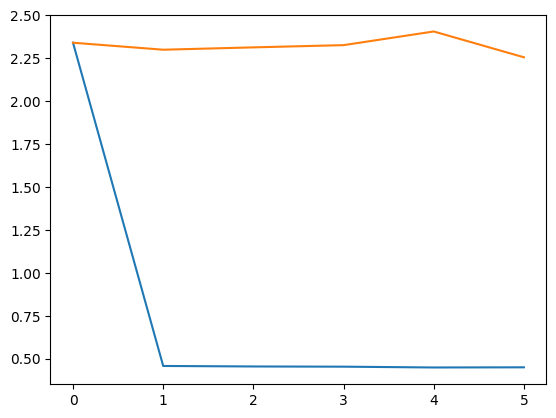

In [36]:
print("initial evalution:")
inital_loss = test(model, loss_fn)
print("start training:")
train_losses = [inital_loss]
test_losses = [inital_loss]
total_epoch = 5
for epoch in range(total_epoch):
    print("----- epoch ", epoch, "-------")
    train_loss = train(model, loss_fn, optimizer)
    test_loss = test(model, loss_fn)
    
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    
# plotting train loss vs test loss
fig, ax = plt.subplots(1,1)
ax.plot([i for i in range(total_epoch + 1)], train_losses)
ax.plot([i for i in range(total_epoch + 1)], test_losses)

In [45]:
torch.save(model,'checkpoint.pth')